<center><img src="https://universodiscreto.com/circle-ud.png"/></center>

# 1. Exemplo Simples

## 1.1 Imports

In [2]:
import numpy as np
import cv2

## 1.2 Carrega lista de arquivos pela pasta

In [3]:
import glob

folder = 'base_mama/*'
image_files_list = glob.glob(folder)

## 1.3 Funções para exibir imagem em grid

In [4]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, 'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, 'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, 'gray')
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

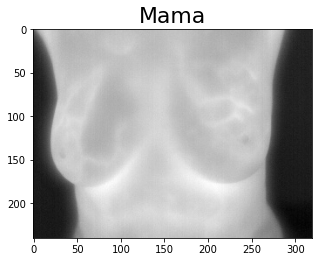

In [5]:
img_filename = image_files_list[2]

img = cv2.imread(img_filename)
showSingleImage(img, "Mama", (5, 5))

## 1.4 Diferentes limiarizações

### 1.4.1 Limiarização Simples

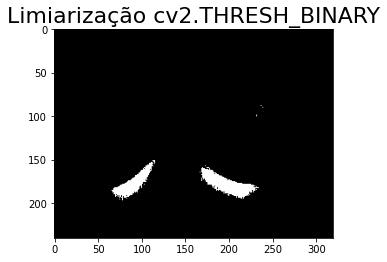

In [6]:
#cv2.THRESH_BINARY
img = cv2.imread(img_filename)
thresh, img_thresh = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY)

showSingleImage(img_thresh, "Limiarização cv2.THRESH_BINARY", (5, 5))

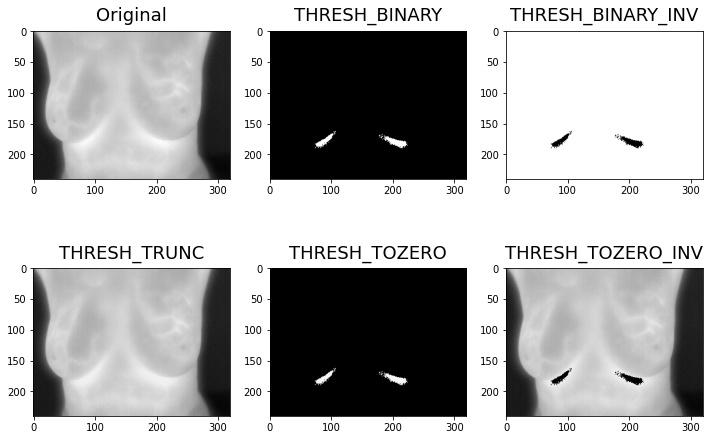

In [7]:
limiar = 240

imgOriginal = cv2.imread(img_filename)
_, imgBinary = cv2.threshold(imgOriginal, limiar, 255, cv2.THRESH_BINARY)
_, imgBinaryInv = cv2.threshold(imgOriginal, limiar, 255, cv2.THRESH_BINARY_INV)
_, imgTrunc = cv2.threshold(imgOriginal, limiar, 255, cv2.THRESH_TRUNC)
_, imgToZero = cv2.threshold(imgOriginal, limiar, 255, cv2.THRESH_TOZERO)
_, imgToZeroInv = cv2.threshold(imgOriginal, limiar, 255, cv2.THRESH_TOZERO_INV)

imgsArray = [imgOriginal, imgBinary, imgBinaryInv, imgTrunc, imgToZero, imgToZeroInv]
titlesArray = ['Original', 'THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_TRUNC', 'THRESH_TOZERO', 'THRESH_TOZERO_INV']
showMultipleImages(imgsArray, titlesArray, (12, 8), 3, 2)

### 1.4.2 Limiarização Adaptativa

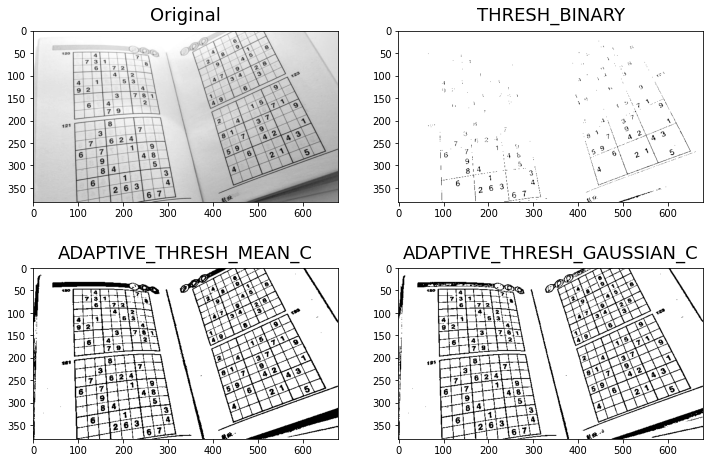

In [8]:
#https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html
block_size = 41
C = 10

imgOriginal = cv2.imread("sudoku.jpg", 0)
_, imgNormThresh = cv2.threshold(imgOriginal, 50, 255, cv2.THRESH_BINARY)
imgAdapMean = cv2.adaptiveThreshold(imgOriginal, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
imgAdapGauss = cv2.adaptiveThreshold(imgOriginal, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

imgsArray = [imgOriginal, imgNormThresh, imgAdapMean, imgAdapGauss]
titlesArray = ['Original', 'THRESH_BINARY', 'ADAPTIVE_THRESH_MEAN_C', 'ADAPTIVE_THRESH_GAUSSIAN_C']
showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 2)

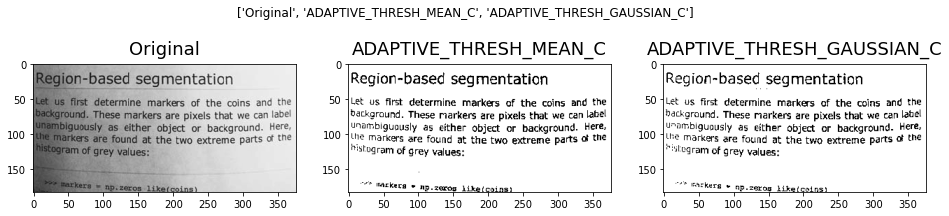

In [10]:
#https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html
#https://www.pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/
block_size = 41
C = 40

imgOriginal = cv2.imread("adap_example.png", 0)
imgAdapMean = cv2.adaptiveThreshold(imgOriginal, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
imgAdapGauss = cv2.adaptiveThreshold(imgOriginal, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

imgsArray = [imgOriginal, imgAdapMean, imgAdapGauss]
titlesArray = ['Original', 'ADAPTIVE_THRESH_MEAN_C', 'ADAPTIVE_THRESH_GAUSSIAN_C']
showMultipleImages(imgsArray, titlesArray, (16, 8), 3, 1)

### 1.4.3 Binarização de Otsu

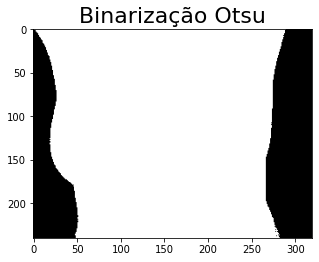

In [11]:
imgOriginal = cv2.imread(image_files_list[2], 0)
limiar, otsu = cv2.threshold(imgOriginal, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

showSingleImage(otsu, "Binarização Otsu", (5, 5))

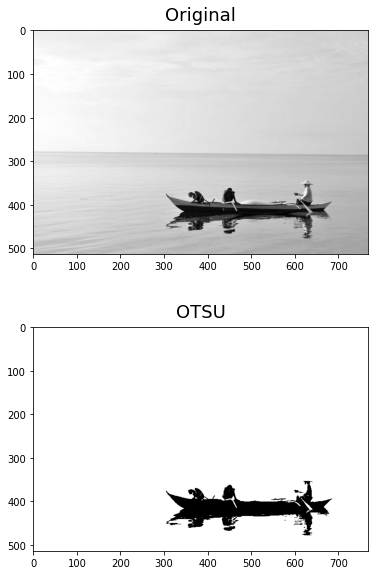

In [19]:
#https://learnopencv.com/otsu-thresholding-with-opencv/
imgOriginal = cv2.imread("barco.jpg", 0)
limiar, otsu = cv2.threshold(imgOriginal, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imgsArray = [imgOriginal, otsu]
titlesArray = ['Original', 'OTSU']

showMultipleImages(imgsArray, titlesArray, (6, 10), 1, 2)

# 2. Limiarização com Trackbar

In [36]:
import time

ESCAPE_KEY_ASCII = 27

def onChange(value):
    pass

#imagem carregada e sua cópia
img = cv2.imread(image_files_list[0])
copyimg = img.copy()

#cria janela gráfica para inserir a imagem
windowTitle = "Ajuste de Limiarizacao"
cv2.namedWindow(windowTitle)

#cria trackbar
cv2.createTrackbar("limiarizacao", windowTitle, 0, 255, onChange)

before_thresh = 0
update_thresh = False
counter_time = 0

while True:
    current_thresh = cv2.getTrackbarPos("limiarizacao", windowTitle)
    
    #valor de limiarização do trackbar foi alterado pelo usuário? (sim)
    if before_thresh != current_thresh:
        update_thresh = True
        counter_time = time.time()
        before_thresh = current_thresh
        
    #se tiver passado 1 segundo desde que o usuário mexeu em algum trackbar
    if time.time() - counter_time > 1:
        #se tiver sido marcado que é pra atualizar limiarização
        if update_thresh == True:
            
            #fazemos uma cópia da imagem original
            _, copyimg = cv2.threshold(img, current_thresh, 255, cv2.THRESH_BINARY)

            update_thresh = False
        
    cv2.imshow(windowTitle, copyimg)
    
    keyPressed = cv2.waitKey(1) & 0xFF
    if keyPressed == ESCAPE_KEY_ASCII:
        break
        
cv2.destroyAllWindows()